<a href="https://colab.research.google.com/github/Rysekk/MNIST-100labels/blob/main/Deep_Learning_projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
from keras.datasets import mnist

#Import de la base de donnée MNIST

(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_Y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_Y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [103]:
import numpy as np

#creation des matrices pour stocker les 100 labels
train_X100label = np.zeros(shape=(100,28,28)).astype('uint8')
train_Y100label = np.zeros(shape=(100)).astype('uint8')

#On selectionne dans X_train et Y_train les 100 labels 
counter = 0
for i in range(10):
    train_filter = np.where(train_Y == [i])
    for j in range(10):
        X_train, Y_train = train_X[train_filter], train_Y[train_filter]
        
        train_X100label[counter] = X_train[counter]
        train_Y100label[counter] = Y_train[counter]
        counter+=1

label num 0:  0
label num 1:  1
label num 2:  2
label num 3:  3
label num 4:  4
label num 5:  5
label num 6:  6
label num 7:  7
label num 8:  8
label num 9:  9


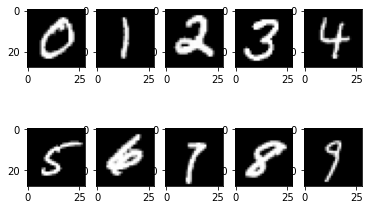

In [104]:
#plot chaque dizaine des 100 labels selectionés
from matplotlib import pyplot
for i in range(10):
    pyplot.subplot(2,5,1+i)
    pyplot.imshow(train_X100label[i*10], cmap=pyplot.get_cmap('gray'))
    print("label num "+str(i)+": ",train_Y100label[i*10])
    #pyplot.show()

In [105]:
#suppression des veleur qui ne servent plus
del X_train,Y_train,train_X,train_Y,train_filter,i,j,counter

In [106]:
#Il ne reste plus qu'à les melanger pour avoir un truc uniforme et sans biais

In [116]:
#passage des images (train et test) en vecteurs taille 784 puis normalisation du vecteur

N = train_X100label.shape[0] 
train_X100label = np.reshape(train_X100label, (N,784))
train_X100label = train_X100label/255

N1 = test_X.shape[0]
test_X = np.reshape(test_X, (N1,784)) 
test_X = test_X/255


In [108]:
from tensorflow.keras.utils import to_categorical

#passage des labels en données catégoriques

train_Y100label = to_categorical(train_Y100label, num_classes = 10)
test_Y = to_categorical(test_Y, num_classes = 10)

In [112]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

#création du réseau de neurones

model = Sequential()
#couche 1 
model.add(Dense(8, input_dim = 784, activation = 'sigmoid'))
#couche 2 
model.add(Dense(8, activation = 'sigmoid'))
#couche 3
model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'] )
#training
model.fit(train_X100label, train_Y100label, batch_size = 32, epochs = 1000)
#evaluation sur les données de test
resultat = model.evaluate(test_X, test_Y)

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.3867 - accuracy: 0.1000
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.3839 - accuracy: 0.1000
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.3807 - accuracy: 0.1000
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.3777 - accuracy: 0.1000
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.3754 - accuracy: 0.1000
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.3734 - accuracy: 0.1000
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.3708 - accuracy: 0.1000
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.3688 - accuracy: 0.1000
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.3671 - accuracy: 0.1000
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 2.3651 - accuracy: 0.1000
Epoch 11/1000
4/4 [